In [86]:
import os
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
RES_FOLDER = 'res'

### Speed vs Accuracy analysis

In [88]:
def load_data_sva(res_folder):
    data = {}
    data_types = set(f.split('_')[2] for f in os.listdir(res_folder))
    algos = set(f.split('_')[0] for f in os.listdir(res_folder))
    p_sizes = set(int(f.split('_')[3].replace('.csv', '')) for f in os.listdir(res_folder))
    
    for t in data_types:
        data[t] = {}
        for a in algos:
            data[t][a] = {}
            for s in p_sizes:
                data[t][a][s] = []
                
    for f in os.listdir(res_folder):
        meta = f.split('_')
        c_type = meta[2]
        a_type = meta[0]
        p_size = int(meta[3].replace('.csv', ''))
   
        with open(os.path.join(res_folder, f), 'r') as csvfile:      
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                data[c_type][a_type][p_size].append(list(map(float, row[0].split(';'))))
    return data

def load_data_fga(res_folder):
    data = {}
    data_types = set(f.split('_')[2] for f in os.listdir(res_folder))
    algos = set(f.split('_')[0] for f in os.listdir(res_folder))
    p_sizes = set(int(f.split('_')[3].replace('.csv', '')) for f in os.listdir(res_folder))
    acc_lvls = set(f.split('_')[1].replace('.csv', '') for f in os.listdir(res_folder)) - {'high', 'low'}
    
    for t in data_types:
        data[t] = {}
        for a in algos:
            data[t][a] = {}
            if a == 'dstemr':
                data[t][a]['low'] = {}
                data[t][a]['high'] = {}
                for s in p_sizes:
                    data[t][a]['low'][s] = []
                    data[t][a]['high'][s] = []  
            elif a == 'dstevx':
                for lvl in acc_lvls:
                    data[t][a][float(lvl)] = {}
                    for s in p_sizes:
                        data[t][a][float(lvl)][s] = []
            else:
                print("IF YOU ARE HERE, I HAVE BAD NEWS FOR YOU?")

    for f in os.listdir(res_folder):
        meta = f.split('_')
        c_type = meta[2]
        a_type = meta[0]
        p_size = int(meta[3].replace('.csv', ''))
        if meta[1] == 'low' or meta[1] == 'high':
            acc_lvl = meta[1]
        else:
            acc_lvl = float(meta[1])
        
        with open(os.path.join(res_folder, f), 'r') as csvfile:      
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                data[c_type][a_type][acc_lvl][p_size].append(list(map(float, row[0].split(';'))))
    return data
                    
data_sva = load_data_sva(RES_FOLDER + '/speed-vs-accuracy')
data_fga = load_data_fga(RES_FOLDER + '/flops-given-accuracy')

### <font color='red'>Real time</font>  VS  <font color='red'>problem size</font>

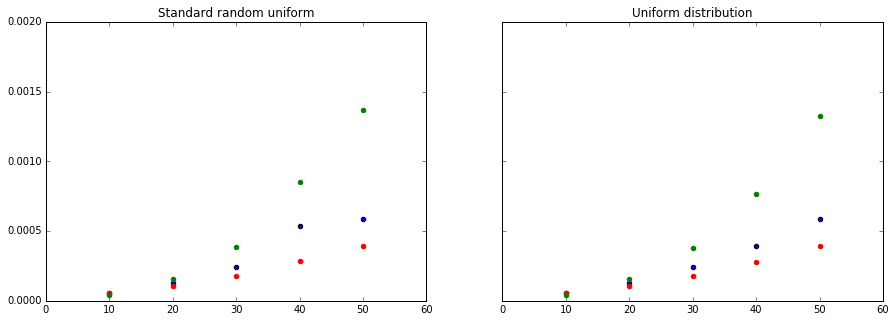

In [304]:
f, axes = plt.subplots(1,2,sharey=True,figsize=(15,5))
plt.ylim([0, 0.002])
axes[0].set_title('Standard random uniform')
for i in range(10, 51, 10):
    d = np.array(data_sva['standard-random-uniform']['dstevx'][i])
    axes[0].scatter(i, np.median(d[:,1]))
    d = np.array(data_sva['standard-random-uniform']['dstemr'][i])
    axes[0].scatter(i, np.median(d[:,1]), color='red')
    d = np.array(data_sva['standard-random-uniform']['dsteqr'][i])
    axes[0].scatter(i, np.median(d[:,1]), color='green')
    
plt.ylim([0, 0.002])
axes[1].set_title('Uniform distribution')
for i in range(10, 51, 10):
    d = np.array(data_sva['uniform-eigenvalues-dist']['dstevx'][i])
    axes[1].scatter(i, np.median(d[:,1]))
    d = np.array(data_sva['uniform-eigenvalues-dist']['dstemr'][i])
    axes[1].scatter(i, np.median(d[:,1]), color='red')
    d = np.array(data_sva['uniform-eigenvalues-dist']['dsteqr'][i])
    axes[1].scatter(i, np.median(d[:,1]), color='green')

### <font color='red'>Orthogonality loss</font>  VS  <font color='red'>problem size</font>

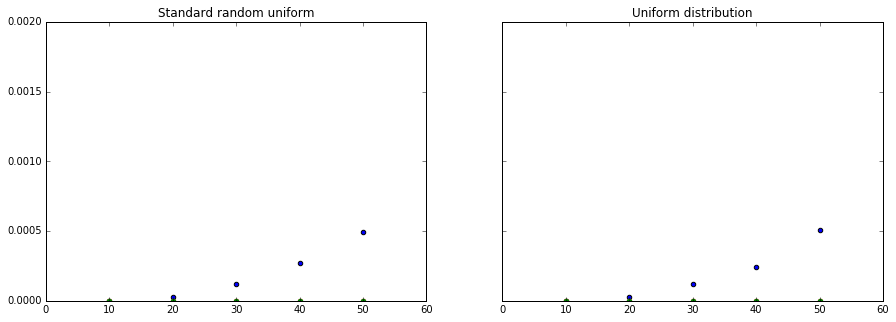

In [311]:
f, axes = plt.subplots(1,2,sharey=True,figsize=(15,5))
plt.ylim([0, 0.002])

axes[0].set_title('Standard random uniform')
for i in range(10, 51, 10):
    d = np.array(data_sva['standard-random-uniform']['dstevx'][i])
    axes[0].scatter(i, np.median(d[:,0]))
    d = np.array(data_sva['standard-random-uniform']['dstemr'][i])
    axes[0].scatter(i, np.median(d[:,0]), color='red')
    d = np.array(data_sva['standard-random-uniform']['dsteqr'][i])
    axes[0].scatter(i, np.median(d[:,0]), color='green')
    
plt.ylim([0, 0.002])
axes[1].set_title('Uniform distribution')
for i in range(10, 51, 10):
    d = np.array(data_sva['uniform-eigenvalues-dist']['dstevx'][i])
    axes[1].scatter(i, np.median(d[:,0]))
    d = np.array(data_sva['uniform-eigenvalues-dist']['dstemr'][i])
    axes[1].scatter(i, np.median(d[:,0]), color='red')
    d = np.array(data_sva['uniform-eigenvalues-dist']['dsteqr'][i])
    axes[1].scatter(i, np.median(d[:,0]), color='green')

### <font color='red'>FLOPS</font> (real time / problem size) given <font color='red'>accuracy</font> for <font color='green'>DSTEVX</font>

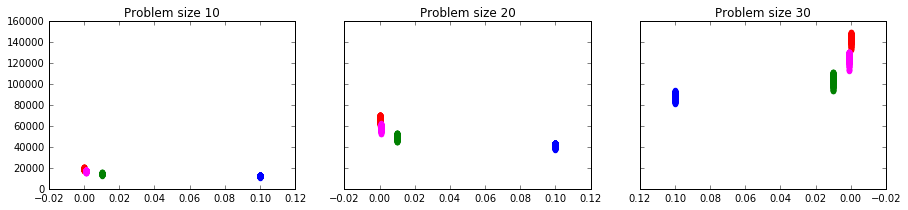

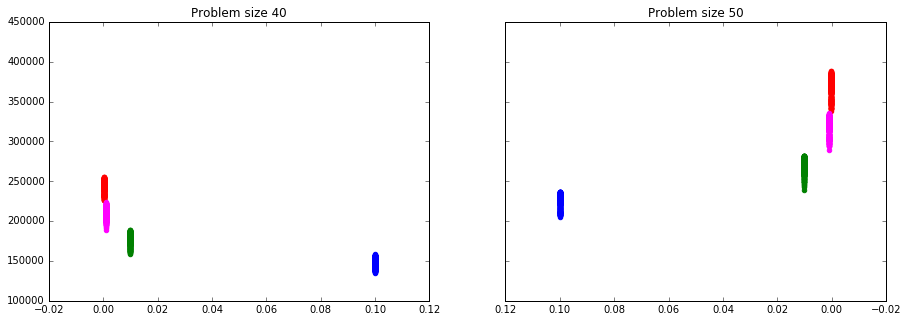

In [220]:
cols = ['blue', 'red', 'green', 'magenta']

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15,3))
plt.gca().invert_xaxis()

for i in range(10, 31, 10):
    axes[(i-1)//10].set_title('Problem size {}'.format(i))
    for c, k in enumerate(data_fga['standard-random-uniform']['dstevx'].keys()):
        d = np.array(data_fga['standard-random-uniform']['dstevx'][k][i])
        axes[(i-1)//10].scatter([k for t in range(len(d[:,2]))], d[:,2], color=cols[c])

f, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
plt.gca().invert_xaxis()

axes[0].set_title('Problem size {}'.format(40))
axes[1].set_title('Problem size {}'.format(50))

for c, k in enumerate(data_fga['standard-random-uniform']['dstevx'].keys()):
    d = np.array(data_fga['standard-random-uniform']['dstevx'][k][40])
    axes[0].scatter([k for t in range(len(d[:,2]))], d[:,2], color=cols[c])
    
for c, k in enumerate(data_fga['standard-random-uniform']['dstevx'].keys()):
    d = np.array(data_fga['standard-random-uniform']['dstevx'][k][50])
    axes[1].scatter([k for t in range(len(d[:,2]))], d[:,2], color=cols[c])

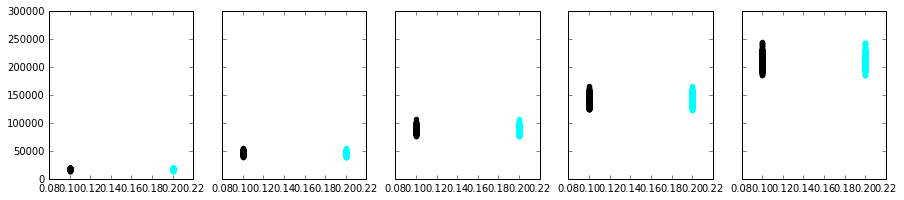

In [210]:
cols = ['black', 'cyan', 'yellow', '#aaaaaa']

f, axes = plt.subplots(1, 5, sharey=True, figsize=(15,3))
for i in range(10, 51, 10):
    for c, k in enumerate(data_fga['standard-random-uniform']['dstemr'].keys()):
        d = np.array(data_fga['standard-random-uniform']['dstemr'][k][i])
        axes[(i-1)//10].scatter([0.1 if k=='low' else 0.2 for t in range(len(d[:,2]))], d[:,2], color=cols[c])

### <font color='red'>Actual accuracy</font> (loss of orthogonality) vs <font color='red'>accuracy level</font>

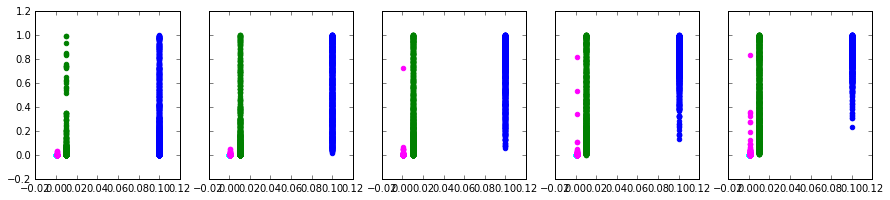

In [232]:
cols = ['blue', 'cyan', 'green', 'magenta', 'yellow']

f, axes = plt.subplots(1, 5, sharey=True, figsize=(15,3))

for i in range(10, 51, 10):
    for c, k in enumerate(data_fga['standard-random-uniform']['dstevx'].keys()):
        d = np.array(data_fga['standard-random-uniform']['dstevx'][k][i])
        axes[(i-1)//10].scatter([k for t in range(len(d[:,0]))], d[:,0], color=cols[c])

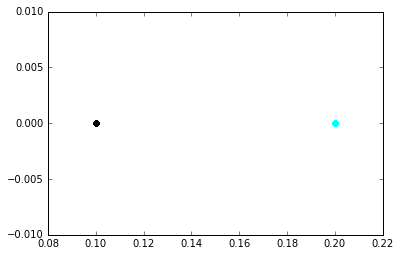

In [233]:
cols = ['black', 'cyan', 'yellow', '#aaaaaa']
        
for c, k in enumerate(data_fga['standard-random-uniform']['dstemr'].keys()):
    for i in range(10, 51, 10):
        d = np.array(data_fga['standard-random-uniform']['dstemr'][k][i])
        plt.scatter([0.1 if k=='low' else 0.2 for t in range(len(d[:,0]))], d[:,0], color=cols[c])